In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
# 添加缺失的vwap字段（如果未提供）
if 'vwap' not in df.columns:
    df['vwap'] = df['turnover'] / df['volume']

In [4]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [5]:
# 定义KUP1因子计算函数
def calculate_kup1(df):
    """
    计算KUP1因子（上影线长度相对开盘价的比例）
    公式：KUP1 = (high - max(open, close)) / open
    
    参数:
    df: 包含OHLC数据的DataFrame
    """
    # 计算max(open, close)
    max_open_close = np.maximum(df['open'], df['close'])
    
    # 计算上影线长度
    upper_shadow = df['high'] - max_open_close
    
    # 计算KUP1因子
    kup1 = upper_shadow / df['open']
    
    return kup1

# 因子测试框架

In [6]:
evaluator.set_factor(
    factor_data_or_func=calculate_kup1,
    factor_name='calculate_kup1'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): 0.018682
   Rank_IC (Spearman): 0.012644
📊 信息比率:
   IR: 0.152124
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130745
   因子列: calculate_kup1
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


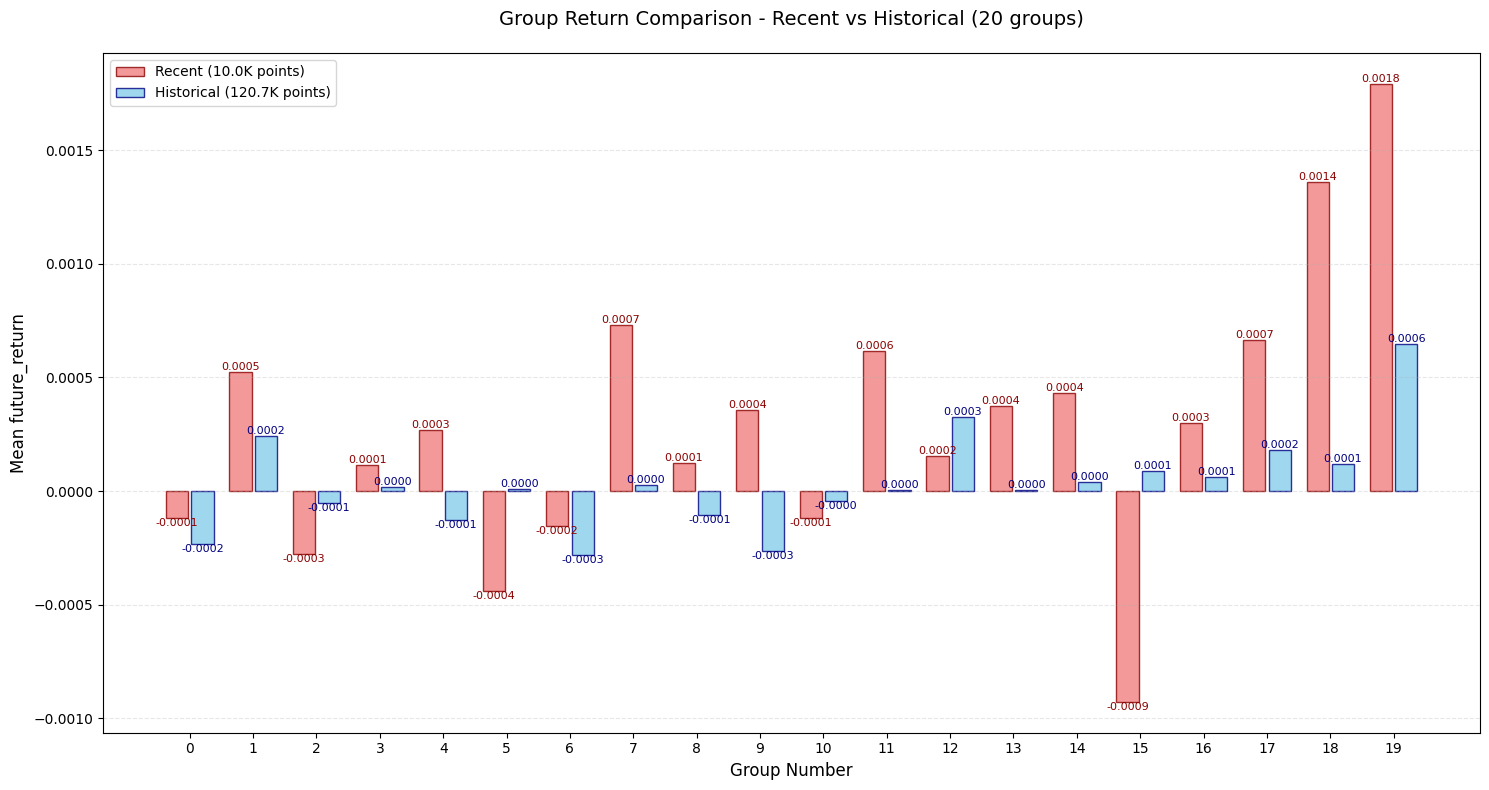

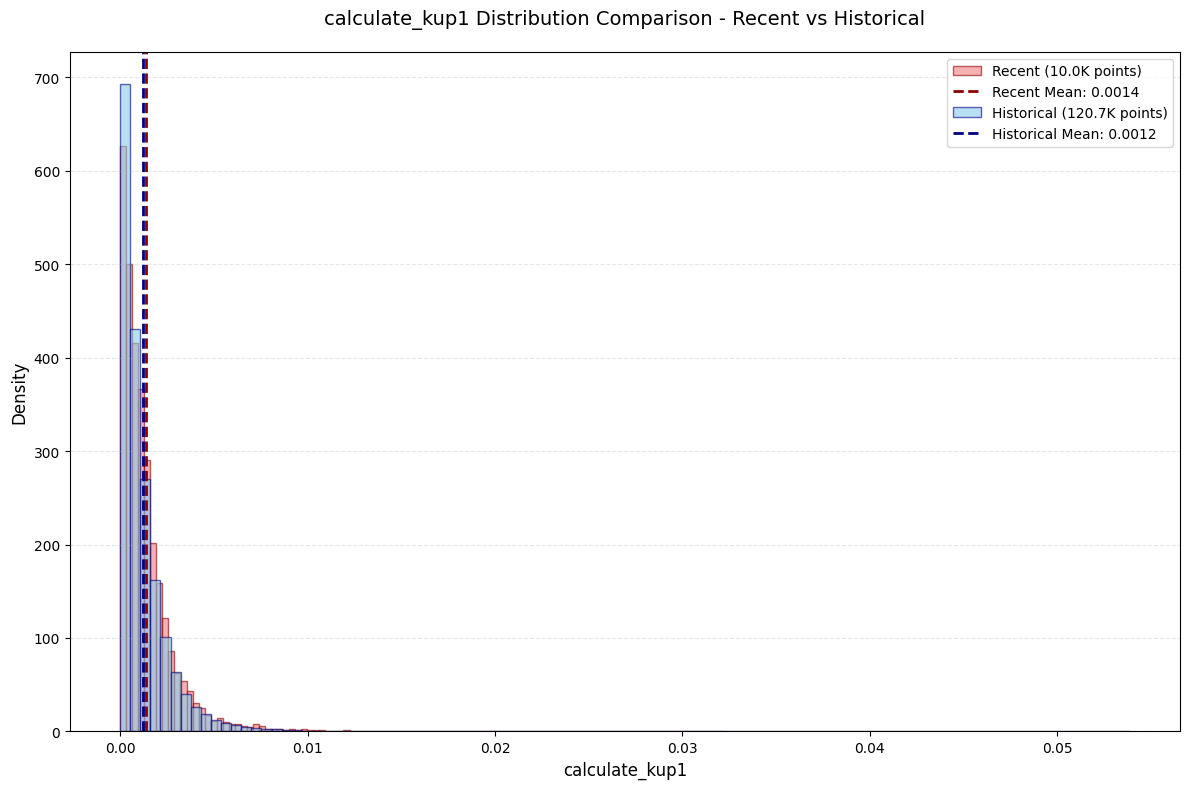

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [ ]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)